In [101]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [102]:
X_origin = pd.read_csv('ch11_Mall_Customers.csv',encoding='gb2312',index_col=0)

In [103]:
X = X_origin.drop(['性别'],axis=1)

In [104]:
#先对数据进行标准化再pca进行降维
from sklearn.preprocessing import scale
X_scaled = scale(X)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

In [105]:
# 使用kmeans进行聚类
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4,random_state=0)
kmeans.fit(X_pca)
y_pred = kmeans.predict(X_pca)
X_origin['pca聚类结果'] = y_pred

/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [106]:
X_origin.head(15)

,性别,年龄,年收入(万元),消费评分(1-100),pca聚类结果
ID,,,,,
1,Male,19,15,39,0
2,Male,21,15,81,0
3,Female,20,16,6,3
4,Female,23,16,77,0
5,Female,31,17,40,0
6,Female,22,17,76,0
7,Female,35,18,6,3
8,Female,23,18,94,0
9,Male,64,19,3,3


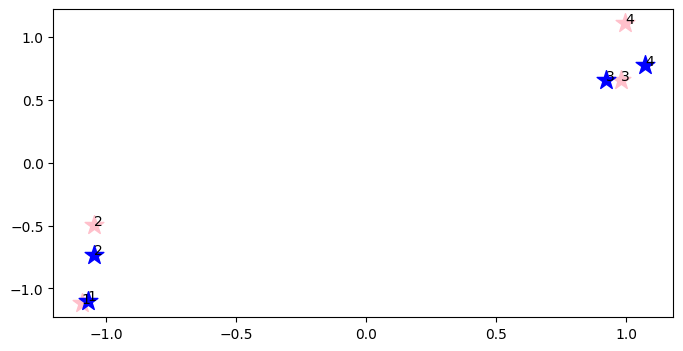

In [107]:
# 查看聚类中心
centers_pca = kmeans.cluster_centers_
centers_pca.sort(axis=0)
textbook_cen = np.array([[-1.07064263,-1.09674023],[-1.04671072,-0.73117843],[0.92174118,0.65699063],[1.07224004,0.77785535]])
# 作图
plt.figure(figsize=(8,4))
for i in range(centers_pca.shape[0]):
    # 设置原来的聚类中心为浅红色，教材中的聚类中心为红色
    plt.scatter(centers_pca[i,0],centers_pca[i,1],c='pink',marker='*',s=200)
    plt.scatter(textbook_cen[i,0],textbook_cen[i,1],c='blue',marker='*',s=200)
    plt.text(centers_pca[i,0],centers_pca[i,1],str(i+1),fontsize=10)
    plt.text(textbook_cen[i,0],textbook_cen[i,1],str(i+1),fontsize=10)

In [108]:
print('pca聚类结果按年龄统计均值')
g_Age=X_origin['年龄'].groupby(X_origin['pca聚类结果'])
print(g_Age.mean().sort_values())
print('pca聚类结果按年收入统计均值')
g_Income=X_origin['年收入(万元)'].groupby(X_origin['pca聚类结果'])
print(g_Income.mean().sort_values())
print('pca聚类结果按消费评分统计均值')
g_Rate=X_origin['消费评分(1-100)'].groupby(X_origin['pca聚类结果'])
print(g_Rate.mean().sort_values())

pca聚类结果按年龄统计均值
pca聚类结果
0    25.605263
2    30.000000
1    41.685714
3    52.144928
Name: 年龄, dtype: float64
pca聚类结果按年收入统计均值
pca聚类结果
0    32.631579
3    46.333333
2    79.086207
1    88.228571
Name: 年收入(万元), dtype: float64
pca聚类结果按消费评分统计均值
pca聚类结果
1    17.285714
3    40.072464
0    67.500000
2    70.775862
Name: 消费评分(1-100), dtype: float64


In [109]:
# 不经scale以及pca降维
data = X_origin.drop(['pca聚类结果','性别'],axis=1)
kmeans.fit(data)
y_pred = kmeans.predict(data)
X_origin['原始数据聚类结果'] = y_pred

/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [110]:
X_origin.head(15)

,性别,年龄,年收入(万元),消费评分(1-100),pca聚类结果,原始数据聚类结果
ID,,,,,,
1,Male,19,15,39,0,3
2,Male,21,15,81,0,3
3,Female,20,16,6,3,0
4,Female,23,16,77,0,3
5,Female,31,17,40,0,0
6,Female,22,17,76,0,3
7,Female,35,18,6,3,0
8,Female,23,18,94,0,3
9,Male,64,19,3,3,0


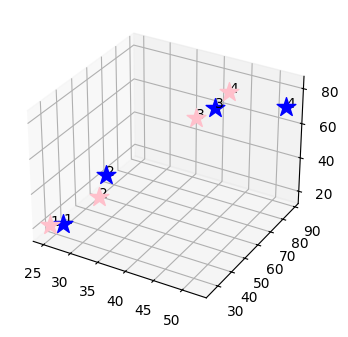

In [115]:
# 计算pca中心
temp_res = X_origin.groupby(['pca聚类结果'])[X_origin.columns[1:4]].mean()
pca_cen = np.array(temp_res)
pca_cen.sort(axis=0)
# 计算原始数据中心
ori_cen = kmeans.cluster_centers_
ori_cen.sort(axis=0)
# 作图
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111, projection='3d')
for i in range(ori_cen.shape[0]):
    # 设置原来的聚类中心为浅红色，教材中的聚类中心为红色,三维图
    ax.scatter(ori_cen[i,0],ori_cen[i,1],ori_cen[i,2],c='pink',marker='*',s=200)
    ax.scatter(pca_cen[i,0],pca_cen[i,1],pca_cen[i,2],c='blue',marker='*',s=200)
    ax.text(ori_cen[i,0],ori_cen[i,1],ori_cen[i,2],str(i+1),fontsize=10)
    ax.text(pca_cen[i,0],pca_cen[i,1],pca_cen[i,2],str(i+1),fontsize=10)

In [112]:
print('原始数据聚类结果按年龄统计均值')
g_Age=X_origin['年龄'].groupby(X_origin['原始数据聚类结果'])
print(g_Age.mean().sort_values())
print('原始数据聚类结果按年收入统计均值')
g_Income=X_origin['年收入(万元)'].groupby(X_origin['原始数据聚类结果'])
print(g_Income.mean().sort_values())
print('原始数据聚类结果按消费评分统计均值')
g_Rate=X_origin['消费评分(1-100)'].groupby(X_origin['原始数据聚类结果'])
print(g_Rate.mean().sort_values())

原始数据聚类结果按年龄统计均值
原始数据聚类结果
3    24.821429
2    32.692308
1    40.394737
0    44.894737
Name: 年龄, dtype: float64
原始数据聚类结果按年收入统计均值
原始数据聚类结果
3    28.714286
0    48.705263
2    86.538462
1    87.000000
Name: 年收入(万元), dtype: float64
原始数据聚类结果按消费评分统计均值
原始数据聚类结果
1    18.631579
0    42.631579
3    74.250000
2    82.128205
Name: 消费评分(1-100), dtype: float64


In [113]:
data2 = X_origin.drop(['性别','pca聚类结果','原始数据聚类结果'],axis=1)

In [114]:
# 原始数据
# 对前160个样本进行聚类然后对后面的样本进行预测
kmeans.fit(data2[:160])
y_pred = kmeans.predict(data2[160:])
true_label = X_origin['原始数据聚类结果'][160:]
from sklearn.metrics import accuracy_score
print('准确率：',accuracy_score(true_label,y_pred))

准确率： 0.5


/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
